# Промежуточная аттестация №1

Аттестационная работа состоит из двух заданий, которые проверяют ваши знания по основным темам, пройденным на лекциях в первом блоке.  
Для прохождения аттестации необходимо выполнить оба задания и загрузить результат на платформу в формате *.ipynb.

**Важно:** задания во многом творческие и не имеют единственно правильного решения!

### Задание 1:

**Описание:** Выберите интересный вам DataSet на https://www.kaggle.com/datasets (выгрузите его и приложите к решению ИЛИ включите в решение импорт DataSet-a из внешнего источника, который публично доступен без регистрации!). 

**Ограничение:** размер DataSet-а не более 10Mb.

Выполните следующие шаги:
1. Получение данных:
    - Напишите код для загрузки данных вашего DataSet-a
2. Предварительная обработка данных:
    - Преобразуйте данные в DataFrame.
    - Выполните очистку данных (удалите пропущенные значения, если есть). 
    - Добавьте новые вычисляемые атрибуты, если в них есть смысл.
3.   Вычисление статистик и показателей – от 3 до 5 по вашему DataSet-у исходя из предметной области.  
* Например, для коллекции фильмов это может быть:  
    - Количество фильмов по жанрам.
    - Средний рейтинг фильмов.
    - Фильмы с наивысшим рейтингом.
4. Визуализация данных – от 3 до 5 графиков по вашему DataSet-у исходя из предметной области. 
* Например, для коллекции фильмов это может быть:
    - Гистограмма количества фильмов по годам или жанрам. 
    - График распределения рейтингов фильмов.


In [ ]:
# Установка 
#!pip install kaggle

In [3]:
from kagglehub import KaggleDatasetAdapter
import kagglehub
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

lettuce_dataset = "lettuce_dataset.csv"

# Загрузка данных через kagglehub
df_lettuce = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "jurijsruko/lettuce",
    lettuce_dataset,
    pandas_kwargs={"encoding": "windows-1252"}
)

# Сохраняем DataFrame на компьютере
output_file = "lettuce_dataset.csv" 
df_lettuce.to_csv(output_file, index=False, encoding='windows-1252')

print(f"Датасет сохранен в файл: {output_file}")

Датасет сохранен в файл: lettuce_dataset.csv


In [9]:
import pandas as pd

# Загружаем данные
lettuce_dataset = 'lettuce_dataset.csv'

# Преобразуем данные в DataFrame
df_lettuce = pd.read_csv(lettuce_dataset, encoding='windows-1252')

# Выводим первые 5 строк данных
print("Первые 5 строк данных:")
print(df_lettuce.head())

# Удаляем строки с пропущенными значениями
print(df_lettuce.isna().sum())
df_lettuce_cleaned = df_lettuce.dropna()


# Преобразуем даты в правильный формат
if 'Date' in df_lettuce_cleaned.columns:
    df_lettuce_cleaned['Date'] = pd.to_datetime(
        df_lettuce_cleaned['Date'], errors='coerce')
    
#print(df_lettuce_cleaned.describe().T)

Первые 5 строк данных:
   Plant_ID      Date  Temperature (°C)  Humidity (%)  TDS Value (ppm)  \
0         1  8/3/2023              33.4            53              582   
1         1  8/4/2023              33.5            53              451   
2         1  8/5/2023              33.4            59              678   
3         1  8/6/2023              33.4            68              420   
4         1  8/7/2023              33.4            74              637   

   pH Level  Growth Days  
0       6.4            1  
1       6.1            2  
2       6.4            3  
3       6.4            4  
4       6.5            5  
Plant_ID            0
Date                0
Temperature (°C)    0
Humidity (%)        0
TDS Value (ppm)     0
pH Level            0
Growth Days         0
dtype: int64


In [3]:
# Рассчитаем несколько статистик

# Средняя температура (если есть столбец 'Temperature (°C)')
avg_temperature = df_lettuce_cleaned['Temperature (°C)'].mean()
print(f"Средняя температура: {avg_temperature}°C")

# Средняя влажность (если есть столбец 'Humidity (%)')
avg_humidity = df_lettuce_cleaned['Humidity (%)'].mean()
print(f"Средняя влажность: {avg_humidity}%")

# Среднее значение TDS (если есть столбец 'TDS Value (ppm)')
avg_tds = df_lettuce_cleaned['TDS Value (ppm)'].mean()
print(f"Среднее значение TDS: {avg_tds} ppm")

# Средний уровень pH (если есть столбец 'pH Level')
avg_ph = df_lettuce_cleaned['pH Level'].mean()
print(f"Средний уровень pH: {avg_ph}")

Средняя температура: 28.14222152098454°C
Средняя влажность: 64.8734616598296%
Среднее значение TDS: 598.0454402019565 ppm
Средний уровень pH: 6.3992111076049225


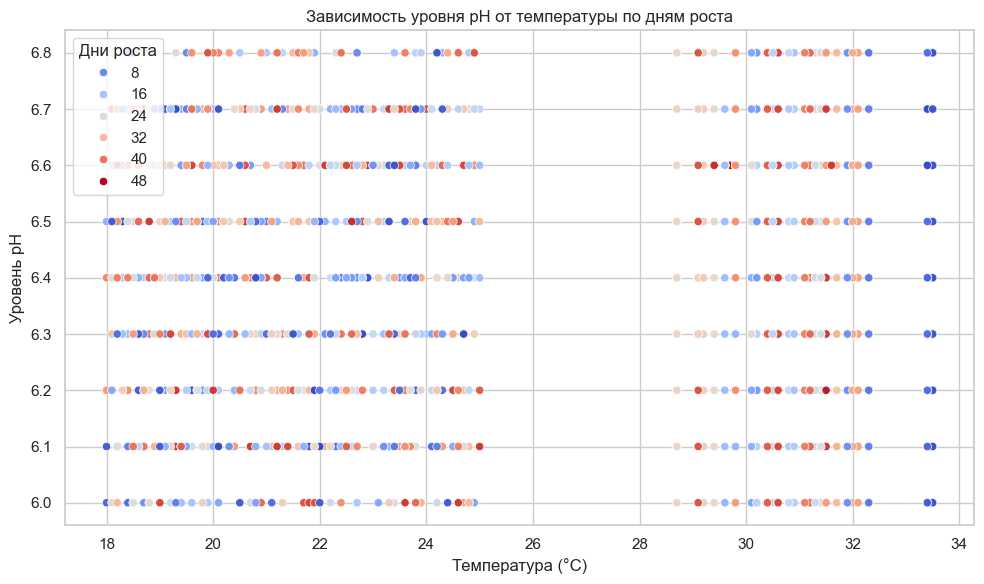

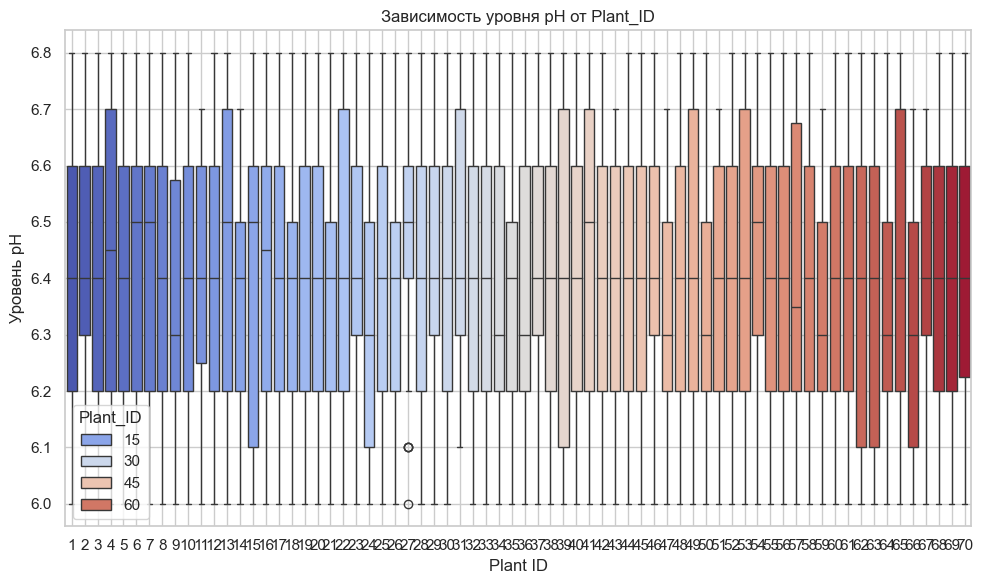

<Figure size 1200x600 with 0 Axes>

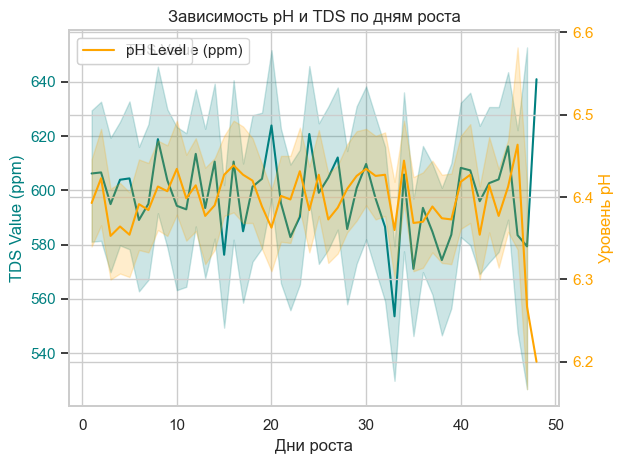

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение графика зависимости pH от температуры
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

# Строим диаграмму рассеяния (scatter plot)
sns.scatterplot(data=df_lettuce_cleaned, x="Temperature (°C)",
                y="pH Level", hue="Growth Days", palette="coolwarm", marker="o")

# Добавляем название графика и метки осей
plt.title("Зависимость уровня pH от температуры по дням роста")
plt.xlabel("Температура (°C)")
plt.ylabel("Уровень pH")
plt.legend(title="Дни роста", loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# График зависимости pH от Plant_ID 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_lettuce_cleaned, x="Plant_ID",
            y="pH Level", palette="coolwarm", hue="Plant_ID")
plt.title("Зависимость уровня pH от Plant_ID")
plt.xlabel("Plant ID")
plt.ylabel("Уровень pH")
plt.grid(True)
plt.tight_layout()
plt.show()

# Построение графика зависимости pH от TDS по дням роста
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Создаем два подграфика для отображения зависимости pH и TDS по дням
fig, ax1 = plt.subplots()

# График TDS (основная ось)
sns.lineplot(data=df_lettuce_cleaned, x="Growth Days",
             y="TDS Value (ppm)", ax=ax1, color="teal", label="TDS Value (ppm)")
ax1.set_xlabel("Дни роста")
ax1.set_ylabel("TDS Value (ppm)", color="teal")
ax1.tick_params(axis="y", labelcolor="teal")

# Создаем вторую ось для pH
ax2 = ax1.twinx()
sns.lineplot(data=df_lettuce_cleaned, x="Growth Days",
             y="pH Level", ax=ax2, color="orange", label="pH Level")
ax2.set_ylabel("Уровень pH", color="orange")
ax2.tick_params(axis="y", labelcolor="orange")

# Добавляем заголовок
plt.title("Зависимость pH и TDS по дням роста")
plt.tight_layout()

# Показать график
plt.show()

### Задание 2:

Некоторые системы выстраивают схему данных в базе в несколько необычном формате:  
в одной таблице хранятся экземпяры сущностей, а в другой пары их атрибутов (название атрибута - значение атрибута).  
Такая модель хранения назвается EAV - Entity Atribute Value.

Будучи разработчиком системы вы можете не подозревать, какие подводные камни могут быть с этим связаны.

Рассмотрим простой пример, допустим у вас есть 2 таблиц в такой схеме хранения:
1) Таблица и базовой информацией о пользователях - users:

In [ ]:
create table users (
	id int primary key,
	full_name varchar(100)
);

insert into users (id, full_name) 
values (1, 'Иванов Иван'), 
       (2, 'Анина Анна'),
	   (3, 'Матвеев Матвей');

2) Таблица с атрибутами пользователей - users_meta:

In [ ]:
create table users_meta (
	id int primary key,
	user_id int references users(id),
	meta varchar(16),
	meta_value varchar(64)
);

insert into users_meta (id, user_id, meta, meta_value) 
values (1, 1, 'birth-date', '2000-01-02'),
	   (2, 1, 'phone-number', '89998887766'),
	   (3, 1, 'activity-flag', 'Y'),
	   (4, 1, 'register-date', '2025-02-04');
	   
insert into users_meta (id, user_id, meta, meta_value) 
values (5, 2, 'birth-date', '2002-06-12'),
	   (6, 2, 'activity-flag', 'N'),
	   (7, 2, 'register-date', '2023-01-23');
	   
insert into users_meta (id, user_id, meta, meta_value) 
values (8, 3, 'phone-number', '89998884455'),
	   (9, 3, 'activity-flag', 'Y'),
	   (10, 3, 'register-date', '2024-12-05');

В информационной системе для обращения к данным используется нотация, очень похожая на работу через ORM.  
Например, так выглядит запрос, который будет вытаскивать ID пользователей, для которых заполен хотябы один из атрибутов `birth-date`, `phone-number`, `activity-flag` или `register-date`:

In [ ]:
query = new User_Query( 
    array( 'meta_query' => array( 
        array( 'key' => 'birth-date' ),
        array( 'key' => 'phone-number'),
        array( 'key' => 'activity-flag' ),
        array( 'key' => 'register-date' ),
        'relation' => 'OR' ) ) );

При формировании запроса "под капотом" система преобразует это обращени в обычный SQL запрос вида:

In [ ]:
# исходный запрос
SELECT distinct users.id
FROM users 
	INNER JOIN users_meta AS mt1 ON ( users.ID = mt1.user_id )  
	INNER JOIN users_meta AS mt2 ON ( users.ID = mt2.user_id )  
	INNER JOIN users_meta AS mt3 ON ( users.ID = mt3.user_id )
	INNER JOIN users_meta AS mt4 ON ( users.ID = mt4.user_id )
WHERE 1=1 
AND (( mt1.meta = 'birth-date' AND mt1.meta_value != '' ) 
  OR ( mt2.meta = 'phone-number' AND mt2.meta_value != '' ) 
  OR ( mt3.meta = 'activity-flag' AND mt3.meta_value != '' )
  OR ( mt4.meta = 'register-date' AND mt4.meta_value != '' )
);

Ответьте на несколько вопросов:
* Видите ли вы какие-нибудь проблемы в этом запросе?
* В какой момент пользователи системы начнут испытывать дискомфорт при работе с информационной системой и почему?
* Что можно сделать?

Перепишите запрос так, чтобы исправить ситуацию ИЛИ внесите концептуальные предложения, которые помогут улучшить ситуацию.

* Запрос с кучей соединений — это лишняя сложность, особенно когда данных много. Лучше сделать один JOIN с условием IN, так запрос будет проще и быстрее. Еще стоит добавить индексы на поля user_id, meta, meta_value, чтобы ускорить поиск. Если запросы частые, можно внедрить кеширование, чтобы снизить нагрузку на базу.
* Когда в базе данных накопится много записей.

In [ ]:
# ваш запрос или концептуальные предложения

SELECT distinct users.id
FROM users 
INNER JOIN users_meta AS mt ON (users.ID = mt.user_id)
WHERE mt.meta IN ('birth-date', 'phone-number', 'activity-flag', 'register-date')
AND mt.meta_value != '';